# Data preprocessing
The below **_<u>preprocess_text</u>_** function preprocesses the text field of indiviaual raw in the dataset.

The Steps involved in data preprocessing are:
1. Lowercasing the text.
2. Expand contractions.
3. Remove links if any.
4. Remove punctuations and digits
5. Tokenize the words
6. Stop words removal
7. Lemmetize text. 


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import contractions
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    try:
        # Lowercase the text
        text = text.lower()

        # Expand contractions
        text = ' '.join([contractions.fix(word) for word in text.split()])

        # Remove URLs
        url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        text = re.sub(url_pattern, '', text)

        # Remove punctuation and digits
        # make transition table using below function, the function takes three arguments
        # str.maketrans(x, y, z) 
        # where x is the string of characters to be replaced, y is the string that will replace x and
        # z is the string whose characters are to be removed
        # here str is a built in class whereas string is a module 
        # trans_table = str.maketrans('', '', string.punctuation + string.digits)

        trans_table = str.maketrans('', '', string.punctuation + string.digits)
        text = text.translate(trans_table)

        # Tokenize the text
        words = word_tokenize(text)

        # Remove stop words
        words = [word for word in words if word not in stop_words]

        # Lemmatize the words
        words = [lemmatizer.lemmatize(word) for word in words]

        # Join the words back into a string
        text = ' '.join(words)

        return text
    except Exception as e:
        print(f"Error processing text: {text}")
        print(f"Exception: {e}")
        return ""
    # # Lowercase the text
    # text = text.lower()

    # #expand contractions
    # text = ' '.join([contractions.fix(word) for word in text.split()])

    # #remove url
    # url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    # text = re.sub(url_pattern, '', text)

    # # Remove punctuation and digits
    # # make transition table using below function, the function takes three arguments
    # # str.maketrans(x, y, z) 
    # # where x is the string of characters to be replaced, y is the string that will replace x and
    # # z is the string whose characters are to be removed
    # # here str is a built in class whereas string is a module 
    # trans_table = str.maketrans('', '', string.punctuation + string.digits)

    # text = text.translate(trans_table)

    # # Tokenize the text
    # words = word_tokenize(text)

    # # Remove stop words
    # words = [word for word in words if word not in stop_words]

    # # Stem or lemmatize the words
    # # words = [stemmer.stem(word) for word in words]
    # words = [lemmatizer.lemmatize(word) for word in words]
    # # print("Lemmatized text: ", words)

    # # Join the words back into a string
    # text = ' '.join(words)

    # return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Raw data and preprocessing it

The **_<u>load_rawdata_and_preprocess</u>_** function loads the raw data, preprocesses individual text field for each raw by calling 
**_<u>preprocess_text</u>_** function and then save the preprocessed data to new files.

The below function needs not to be executed more than once as the data is preprocessed and saved in separate files.

In [ ]:
import pandas as pd

def load_rawdata_and_preprocess():
    real_news = pd.read_csv('./Raw data/True.csv')
    fake_news = pd.read_csv('./Raw data/Fake.csv')

    print("Before preprocessing:")
    print(real_news['text'].head())
    print(fake_news['text'].head())

    real_news['text'] = real_news['text'].apply(preprocess_text)
    fake_news['text'] = fake_news['text'].apply(preprocess_text)

    print("After preprocessing:")
    print(real_news['text'].head())
    print(fake_news['text'].head())

    real_news.to_csv('./Processed data/Preprocessed_True.csv', index=False)
    fake_news.to_csv('./Processed data/Preprocessed_Fake.csv', index=False)

# Call the function
# load_rawdata_and_preprocess()

Feature Engineering


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
import numpy as np

#load preprocessed data
# real_news = pd.read_csv("./Processed data/Preprocessed_True.csv")
# fake_news = pd.read_csv("./Processed data/Preprocessed_Fake.csv").

real_news = pd.read_csv("./Raw data/True.csv")
fake_news = pd.read_csv("./Raw data/Fake.csv")

print("Data before vectorizing")
print("Real News: ", real_news['text'].head())
print("Fake News: ", fake_news['text'].head())

print("Checking for NaN values in the datasets...")
print(real_news['text'].isna().sum(), "NaN values found in real_news")
print(fake_news['text'].isna().sum(), "NaN values found in fake_news")

def vectorize_preprocessed_data():
    # Initialize TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit the vectorizer on real news text and transform the text into a TF-IDF matrix
    X_real = vectorizer.fit_transform(real_news['text'])

    # Transform the fake news text into a TF-IDF matrix using the same vectorizer
    X_fake = vectorizer.transform(fake_news['text'])

    # Vertically stack the real and fake news TF-IDF matrices into one large matrix
    X = sp.vstack([X_real, X_fake])

    # Create the target labels (1 for real news, 0 for fake news)
    Y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

    sp.save_npz('./Processed data/Vectorized_Features.npz', X)
    np.save('./Processed data/Labels.npy', Y)

    return X, Y

X, Y = vectorize_preprocessed_data()

Data before vectorizing
Real News:  0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object
Fake News:  0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object
Checking for NaN values in the datasets...
0 NaN values found in real_news
0 NaN values found in fake_news


In [20]:
X, Y = vectorize_preprocessed_data()

# Print shapes to confirm the sizes
print("Shape of X:", X.shape)
print("Shape of y:", Y.shape)

Shape of X: (44898, 66663)
Shape of y: (44898,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

def train_test_validate_split():
    X = sp.load_npz('./Processed data/Vectorized_Features.npz')
    y = np.load('./Processed data/Labels.npy')
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)

    # now split the temp set into test and validation set in the ration 20:10
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)
    print("Temp set shape: ", X_temp.shape, y_temp.shape)
    print("Train set shape: ", X_train.shape, y_train.shape)
    print("Test set shape: ", X_test.shape, y_test.shape)
    print("Validation set shape: ", X_val.shape, y_val.shape)

    return X_train, y_train, X_test, y_test, X_val, y_val, 

X_train, y_train, X_test, y_test, X_val, y_val = train_test_validate_split()


def model_training():

    # instantiate logistic regression
    lr = LogisticRegression(random_state=42)

    lr.fit(X_train, y_train)

    with open('./saved_model/LogisticRegression.pkl', 'wb') as f:
        pickle.dump(lr, f)

model_training()

Temp set shape:  (13470, 66663) (13470,)
Train set shape:  (31428, 66663) (31428,)
Test set shape:  (8980, 66663) (8980,)
Validation set shape:  (4490, 66663) (4490,)


In [28]:

def model_prediction():
    with open('./saved_model/LogisticRegression.pkl', 'rb') as f:
        lr = pickle.load(f)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print("Confusion metrix:\n", cm)
    print("Classification report:\n", cr)

model_prediction()

Accuracy: 0.9869710467706013
Precision: 0.9830508474576272
Recall: 0.9897148200093502
F1 Score: 0.986371578334304
Confusion metrix:
 [[4629   73]
 [  44 4234]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4702
         1.0       0.98      0.99      0.99      4278

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Train test Validation split and Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle

def train_test_validate_split():
    X = sp.load_npz('./Processed data/Vectorized_Features.npz')
    y = np.load('./Processed data/Labels.npy')
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)

    # now split the temp set into test and validation set in the ration 20:10
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)
    print("Temp set shape: ", X_temp.shape, y_temp.shape)
    print("Train set shape: ", X_train.shape, y_train.shape)
    print("Test set shape: ", X_test.shape, y_test.shape)
    print("Validation set shape: ", X_val.shape, y_val.shape)

    return X_train, y_train, X_test, y_test, X_val, y_val, 

X_train, y_train, X_test, y_test, X_val, y_val = train_test_validate_split()

def model_training():

    # instantiate logistic regression
    lr = LogisticRegression(random_state=42)

    lr.fit(X_train, y_train)

    with open('./saved_model/LogisticRegression.pkl', 'wb') as f:
        pickle.dump(lr, f)

model_training()



Temp set shape:  (13470, 70064) (13470,)
Train set shape:  (31428, 70064) (31428,)
Test set shape:  (8980, 70064) (8980,)
Validation set shape:  (4490, 70064) (4490,)


LogisticRegression(random_state=42)

# Model prediction

The function below uses the trained model stored within a pkl file to predict the accuracy and other evaluation parameters.

In [32]:

def model_prediction():
    with open('./saved_model/LogisticRegression.pkl', 'rb') as f:
        lr = pickle.load(f)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print("Confusion metrix:\n", cm)
    print("Classification report:\n", cr)

    return lr, y_pred, accuracy, precision, recall, f1, cm, cr

lr, y_pred, accuracy, precision, recall, f1, cm, cr = model_prediction()

Accuracy: 0.9869710467706013
Precision: 0.9830508474576272
Recall: 0.9897148200093502
F1 Score: 0.986371578334304
Confusion metrix:
 [[4629   73]
 [  44 4234]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4702
         1.0       0.98      0.99      0.99      4278

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Visualization


### Confusion Matrix

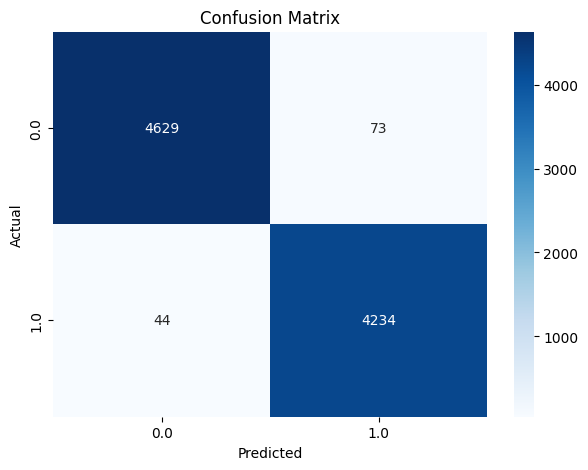

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Classification Report

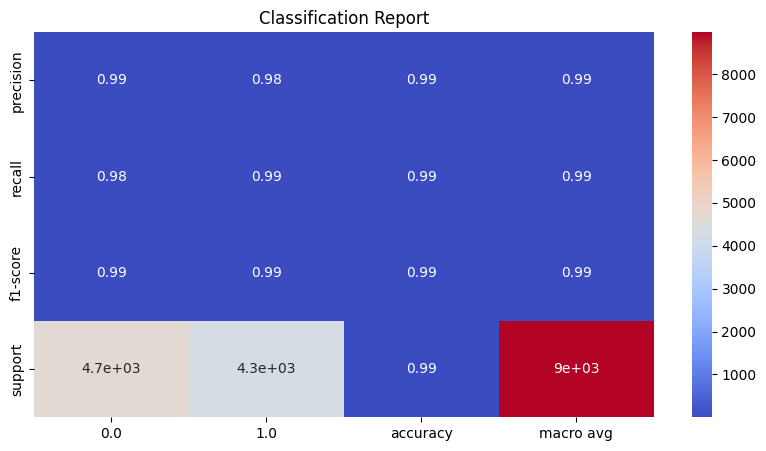

In [34]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true labels and predicted labels respectively
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()
